In [48]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [49]:
torch.manual_seed(1)

In [50]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer
print type(n_data)
#print x0
#print y0
#print x1
#print y1
#print x
#print y

<class 'torch.FloatTensor'>


In [51]:
x, y = Variable(x), Variable(y)

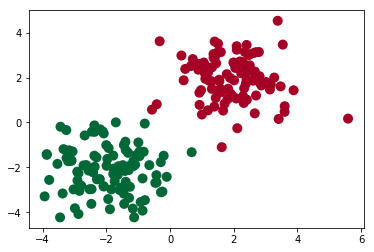

In [52]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [53]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)   # hidden layer
        self.out = torch.nn.Linear(hidden_dim, output_dim)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [54]:
model = NeuralNetwork(input_dim=2, hidden_dim=10, output_dim=2)     # define the network
print(model)

NeuralNetwork(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [55]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
loss_func= torch.nn.CrossEntropyLoss()

In [56]:
epochs=100

epoch 0, loss 0.636804223061


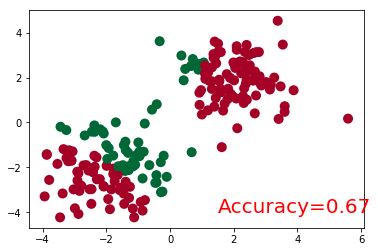

epoch 1, loss 0.587347209454
epoch 2, loss 0.545940220356
epoch 3, loss 0.510769784451
epoch 4, loss 0.480472564697
epoch 5, loss 0.453988879919
epoch 6, loss 0.430580943823
epoch 7, loss 0.409685820341
epoch 8, loss 0.390875130892
epoch 9, loss 0.373808473349
epoch 10, loss 0.358222454786
epoch 11, loss 0.343907088041
epoch 12, loss 0.33069267869
epoch 13, loss 0.318442732096
epoch 14, loss 0.307049155235
epoch 15, loss 0.29641020298
epoch 16, loss 0.286450356245
epoch 17, loss 0.277101784945
epoch 18, loss 0.268306434155
epoch 19, loss 0.260016530752
epoch 20, loss 0.252186059952
epoch 21, loss 0.244774401188
epoch 22, loss 0.237747609615
epoch 23, loss 0.231076568365
epoch 24, loss 0.224736899137
epoch 25, loss 0.218701705337


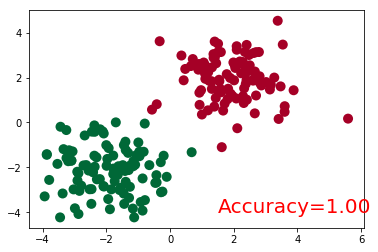

epoch 26, loss 0.212949320674
epoch 27, loss 0.20746062696
epoch 28, loss 0.202217847109
epoch 29, loss 0.197206228971
epoch 30, loss 0.192412674427
epoch 31, loss 0.18782299757
epoch 32, loss 0.183427080512
epoch 33, loss 0.179211869836
epoch 34, loss 0.175164610147
epoch 35, loss 0.171276986599
epoch 36, loss 0.167540207505
epoch 37, loss 0.16394636035
epoch 38, loss 0.160487741232
epoch 39, loss 0.157157599926
epoch 40, loss 0.153949216008
epoch 41, loss 0.150855958462
epoch 42, loss 0.147872000933
epoch 43, loss 0.144993007183
epoch 44, loss 0.142215073109
epoch 45, loss 0.139531865716
epoch 46, loss 0.136939108372
epoch 47, loss 0.134432524443
epoch 48, loss 0.132008835673
epoch 49, loss 0.129663750529
epoch 50, loss 0.127393707633


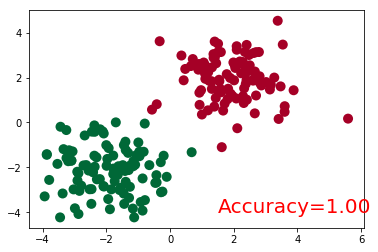

epoch 51, loss 0.125195518136
epoch 52, loss 0.123066186905
epoch 53, loss 0.121003367007
epoch 54, loss 0.119003713131
epoch 55, loss 0.117064453661
epoch 56, loss 0.115182988346
epoch 57, loss 0.113357409835
epoch 58, loss 0.111586131155
epoch 59, loss 0.109865814447
epoch 60, loss 0.108194477856
epoch 61, loss 0.106570333242
epoch 62, loss 0.104991734028
epoch 63, loss 0.103456519544
epoch 64, loss 0.101963222027
epoch 65, loss 0.1005102247
epoch 66, loss 0.0990959852934
epoch 67, loss 0.0977191030979
epoch 68, loss 0.0963782593608
epoch 69, loss 0.0950721353292
epoch 70, loss 0.0937997996807
epoch 71, loss 0.0925596877933
epoch 72, loss 0.0913507044315
epoch 73, loss 0.0901718139648
epoch 74, loss 0.0890219286084
epoch 75, loss 0.0879000648856


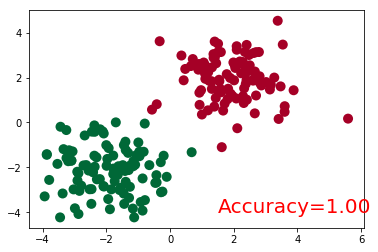

epoch 76, loss 0.0868053361773
epoch 77, loss 0.0857369974256
epoch 78, loss 0.0846939757466
epoch 79, loss 0.0836754143238
epoch 80, loss 0.0826805531979
epoch 81, loss 0.0817087292671
epoch 82, loss 0.0807590857148
epoch 83, loss 0.0798308849335
epoch 84, loss 0.0789234861732
epoch 85, loss 0.0780361443758
epoch 86, loss 0.0771682858467
epoch 87, loss 0.0763193815947
epoch 88, loss 0.0754887983203
epoch 89, loss 0.0746760070324
epoch 90, loss 0.0738804489374
epoch 91, loss 0.0731016173959
epoch 92, loss 0.0723390504718
epoch 93, loss 0.0715922862291
epoch 94, loss 0.0708609223366
epoch 95, loss 0.0701443850994
epoch 96, loss 0.0694423317909
epoch 97, loss 0.0687542706728
epoch 98, loss 0.0680798664689
epoch 99, loss 0.067418679595


In [57]:
for epoch in range(epochs):
    out = model(x)
    loss = loss_func(out, y)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print ('epoch {}, loss {}'.format(epoch,loss.data[0]))
    if epoch % 25 == 0:
        # plot showing learning process
        #print epoch
        plt.cla()
        prediction = torch.max(out, 1)[1]
        #print prediction
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        #print pred_y,target_y
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)


In [43]:
#Try to store and save 

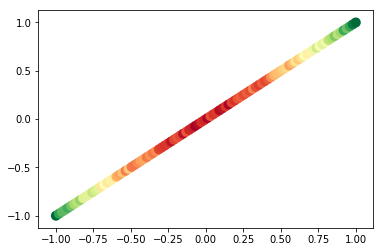

In [46]:
# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)
plt.scatter(x.data.numpy(), x.data.numpy(), c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()